In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import date
import requests

import nba_api
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.static import players
from nba_api.stats.endpoints import playergamelog

import seaborn as sns
sns.set()

In [2]:
#2015-2016 regular season start and end dates
start_15_16 = '2015-10-27'
end_15_16 = '2016-04-13'

#2016-2017 regular season start and end dates
start_16_17 = '2016-10-25'
end_16_17 = '2017-04-12'

#2016-2017 regular season start and end dates
start_17_18 = '2017-10-17'
end_17_18 = '2018-04-11'

#2018-2019 regular season start and end dates
start_18_19 = '2018-10-16'
end_18_19 = '2019-04-10'

In [3]:
teams_df = pd.DataFrame(teams.get_teams())
teams_df.rename(columns={'id':'TEAM_ID'}, inplace=True)
teams_df.head()

,abbreviation,city,full_name,TEAM_ID,nickname,state,year_founded
0,ATL,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949
1,BOS,Boston,Boston Celtics,1610612738,Celtics,Massachusetts,1946
2,CLE,Cleveland,Cleveland Cavaliers,1610612739,Cavaliers,Ohio,1970
3,NOP,New Orleans,New Orleans Pelicans,1610612740,Pelicans,Louisiana,2002
4,CHI,Chicago,Chicago Bulls,1610612741,Bulls,Illinois,1966


In [4]:
# Get **all** the games so we can filter to an individual GAME_ID
result = leaguegamefinder.LeagueGameFinder()
all_games = result.get_data_frames()[0]
all_games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1612709911,IWA,Iowa Wolves,2021900026,2020-03-15,IWA @ MHU,None,107,41,...,0.833,2,15,17,8,1,7,11,8,-16.2
1,22019,1612709926,MHU,Memphis Hustle,2021900026,2020-03-15,MHU vs. IWA,None,120,56,...,1.000,7,17,24,13,5,1,4,7,15.6
2,22019,1612709905,SBL,South Bay Lakers,2021900569,2020-03-11,SBL vs. AUS,W,240,148,...,0.824,12,29,41,30,6,1,17,21,10.0
3,22019,1612709920,RAP,Raptors 905,2021900566,2020-03-11,RAP vs. CPS,W,240,129,...,0.731,14,43,57,23,9,10,21,26,12.6
4,22019,1612709908,RGV,Rio Grande Valley Vipers,2021900567,2020-03-11,RGV vs. IWA,L,241,126,...,0.800,15,31,46,27,9,4,15,18,-8.4


In [5]:
#match NBA teams from 'teams_df' with 'all_games' to remove
#all non NBA-games from 'all_games' 
nba_games = pd.merge(teams_df, all_games, on = 'TEAM_ID', how = 'inner')
#remove columns in merged df coming from 'teams_df'
nba_games = nba_games.drop(list(teams_df.columns)[1:],1)
nba_games.head()

,abbreviation,SEASON_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,ATL,22019,ATL,Atlanta Hawks,0021900969,2020-03-11,ATL vs. NYK,L,265,131,...,0.808,15,38,53,26,6,3,17,25,0.0
1,ATL,22019,ATL,Atlanta Hawks,0021900957,2020-03-09,ATL vs. CHA,W,290,143,...,0.593,12,41,53,33,1,5,15,26,5.0
2,ATL,22019,ATL,Atlanta Hawks,0021900943,2020-03-07,ATL @ MEM,L,240,101,...,0.857,14,32,46,23,9,2,14,24,-17.0
3,ATL,22019,ATL,Atlanta Hawks,0021900930,2020-03-06,ATL @ WAS,L,239,112,...,0.667,6,30,36,25,9,4,17,25,-6.0
4,ATL,22019,ATL,Atlanta Hawks,0021900905,2020-03-02,ATL vs. MEM,L,239,88,...,0.938,16,27,43,20,6,8,17,21,-39.0


In [6]:
#function searches rows in 'nba_games' df sharing same 'GAME_ID' and sums PTS
#to obtain sum of final score
def total_pts_game(id_game):
    return np.sum(nba_games.loc[nba_games['GAME_ID'] == str(id_game)][['PTS']])

In [7]:
#e.g. of applying above function
#total_pts_game(nba_games['GAME_ID'][0])

In [8]:
#uses 'total_pts_game' function to create df of sum of final score for
#all games in 'nba_games' df
total_points = pd.DataFrame(list(map(lambda x : total_pts_game(nba_games['GAME_ID'][x]), list(range(len(nba_games))))))

In [9]:
#appends new column to 'nba_games' df containing combined final score per game
nba_games['COMBINED_FINAL_SCORE'] = total_points
nba_games.head()

,abbreviation,SEASON_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,COMBINED_FINAL_SCORE
0,ATL,22019,ATL,Atlanta Hawks,0021900969,2020-03-11,ATL vs. NYK,L,265,131,...,15,38,53,26,6,3,17,25,0.0,267
1,ATL,22019,ATL,Atlanta Hawks,0021900957,2020-03-09,ATL vs. CHA,W,290,143,...,12,41,53,33,1,5,15,26,5.0,281
2,ATL,22019,ATL,Atlanta Hawks,0021900943,2020-03-07,ATL @ MEM,L,240,101,...,14,32,46,23,9,2,14,24,-17.0,219
3,ATL,22019,ATL,Atlanta Hawks,0021900930,2020-03-06,ATL @ WAS,L,239,112,...,6,30,36,25,9,4,17,25,-6.0,230
4,ATL,22019,ATL,Atlanta Hawks,0021900905,2020-03-02,ATL vs. MEM,L,239,88,...,16,27,43,20,6,8,17,21,-39.0,215


In [10]:
#mask to filter dates within range
mask_15_16 = (nba_games['GAME_DATE'] >= start_15_16) & (nba_games['GAME_DATE'] <= end_15_16)
mask_16_17 = (nba_games['GAME_DATE'] >= start_16_17) & (nba_games['GAME_DATE'] <= end_16_17)
mask_17_18 = (nba_games['GAME_DATE'] >= start_17_18) & (nba_games['GAME_DATE'] <= end_17_18)
mask_18_19 = (nba_games['GAME_DATE'] >= start_18_19) & (nba_games['GAME_DATE'] <= end_18_19)

In [11]:
#regular season games held between given seasons
nba_games_15_16 = nba_games.loc[mask_15_16]
nba_games_16_17 = nba_games.loc[mask_16_17]
nba_games_17_18 = nba_games.loc[mask_17_18]
nba_games_18_19 = nba_games.loc[mask_18_19]

In [12]:
nba_games_15_16.head()

,abbreviation,SEASON_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,COMBINED_FINAL_SCORE
377,ATL,22015,ATL,Atlanta Hawks,0021501221,2016-04-13,ATL @ WAS,L,240,98,...,9,38,47,22,13,5,22,21,-11.0,207
378,ATL,22015,ATL,Atlanta Hawks,0021501203,2016-04-11,ATL @ CLE,L,240,94,...,10,32,42,23,8,6,15,18,-15.0,203
379,ATL,22015,ATL,Atlanta Hawks,0021501188,2016-04-09,ATL vs. BOS,W,240,118,...,5,39,44,31,10,10,17,22,11.0,225
380,ATL,22015,ATL,Atlanta Hawks,0021501173,2016-04-07,ATL vs. TOR,W,239,95,...,5,36,41,23,4,12,13,19,8.0,182
381,ATL,22015,ATL,Atlanta Hawks,0021501157,2016-04-05,ATL vs. PHX,W,242,103,...,13,37,50,26,16,3,16,21,13.0,193


In [13]:
nba_games_15_16.loc[nba_games['TEAM_ABBREVIATION'] == 'LAL'].head()

,abbreviation,SEASON_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,COMBINED_FINAL_SCORE
6640,LAL,22015,LAL,Los Angeles Lakers,0021501228,2016-04-13,LAL vs. UTA,W,239,101,...,8,39,47,19,6,3,13,17,5.0,197
6641,LAL,22015,LAL,Los Angeles Lakers,0021501209,2016-04-11,LAL @ OKC,L,240,79,...,10,38,48,15,8,1,15,20,-33.0,191
6642,LAL,22015,LAL,Los Angeles Lakers,0021501195,2016-04-10,LAL @ HOU,L,239,110,...,7,33,40,25,10,3,18,15,-20.0,240
6643,LAL,22015,LAL,Los Angeles Lakers,0021501184,2016-04-08,LAL @ NOP,L,240,102,...,10,24,34,18,9,5,13,23,-8.0,212
6644,LAL,22015,LAL,Los Angeles Lakers,0021501172,2016-04-06,LAL vs. LAC,L,241,81,...,16,33,49,12,6,1,12,16,-10.0,172


In [26]:
nba_games.columns

Index(['abbreviation', 'SEASON_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME',
       'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS',
       'COMBINED_FINAL_SCORE'],
      dtype='object')

## Lets start by looking at the performance of each time individually

### Team Offensive metrics

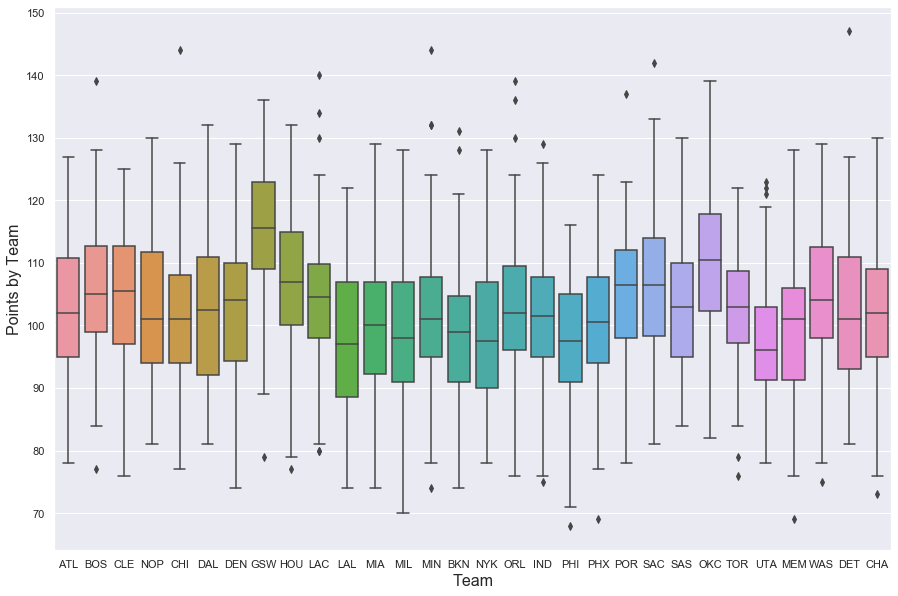

In [36]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
sns.boxplot(data = nba_games_15_16, x="TEAM_ABBREVIATION", y="PTS", ax = ax)
plt.xlabel("Team", fontsize = 16)
plt.ylabel("Points by Team", fontsize = 16)
plt.show()

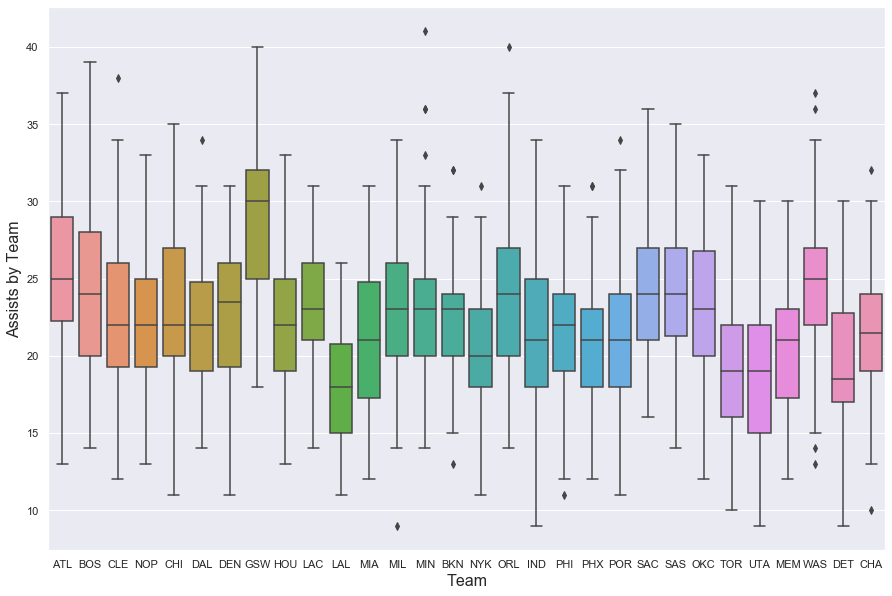

In [37]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
sns.boxplot(data = nba_games_15_16, x="TEAM_ABBREVIATION", y="AST", ax = ax)
plt.xlabel("Team", fontsize = 16)
plt.ylabel("Assists by Team", fontsize = 16)
plt.show()

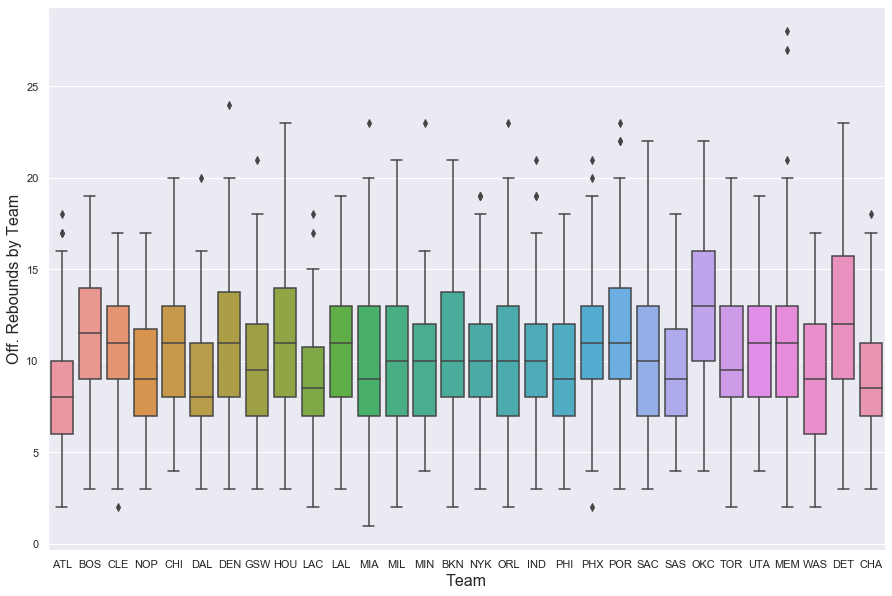

In [39]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
sns.boxplot(data = nba_games_15_16, x="TEAM_ABBREVIATION", y="OREB", ax = ax)
plt.xlabel("Team", fontsize = 16)
plt.ylabel("Off. Rebounds by Team", fontsize = 16)
plt.show()

### Team Defensive metrics

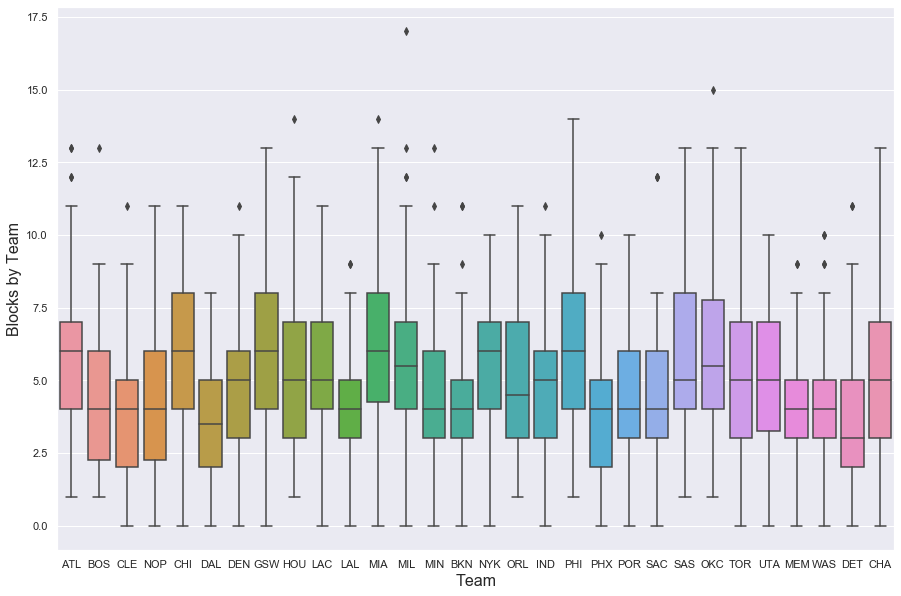

In [38]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
sns.boxplot(data = nba_games_15_16, x="TEAM_ABBREVIATION", y="BLK", ax = ax)
plt.xlabel("Team", fontsize = 16)
plt.ylabel("Blocks by Team", fontsize = 16)
plt.show()

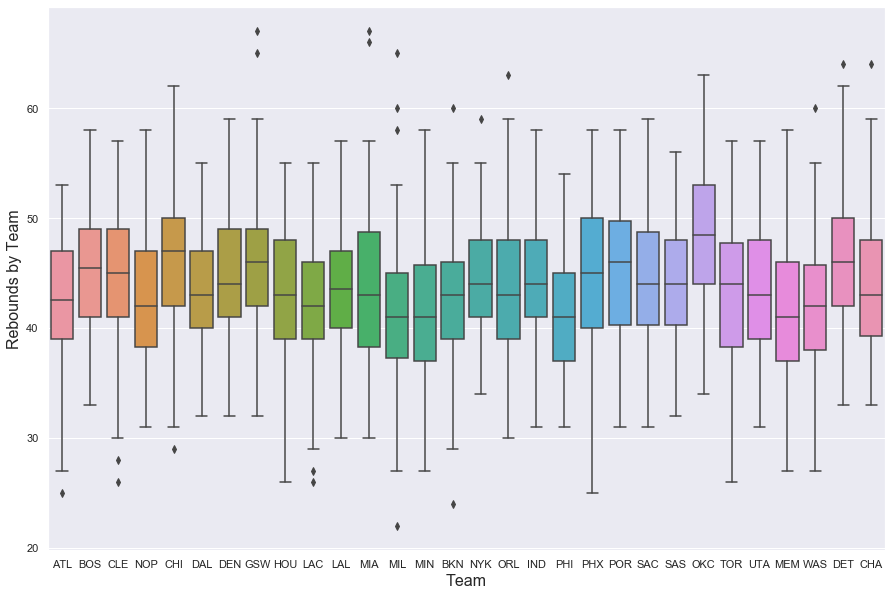

In [40]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
sns.boxplot(data = nba_games_15_16, x="TEAM_ABBREVIATION", y="REB", ax = ax)
plt.xlabel("Team", fontsize = 16)
plt.ylabel("Rebounds by Team", fontsize = 16)
plt.show()

## Looking for simple predictive features

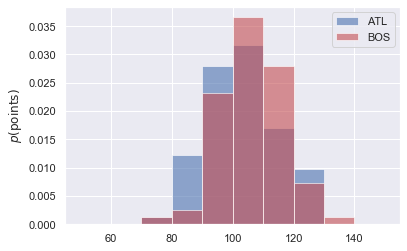

In [66]:
#Probably the silliest thing to do is just add the distributions.
#This assumes that the number of points that each team scores is independent of the other team
#take ATL and BOS as examples
bins = [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]
mask_ATL = (nba_games_15_16['TEAM_ABBREVIATION'] == 'ATL')
mask_BOS = (nba_games_15_16['TEAM_ABBREVIATION'] == 'BOS')

#atl_pts = 
cts_ATL, _, _ = plt.hist(nba_games_15_16.loc[mask_ATL]['PTS'], density=True, 
                         color='b', alpha=0.6, bins=bins, label='ATL')
cts_BOS, _, _ = plt.hist(nba_games_15_16.loc[mask_BOS]['PTS'], density=True, 
                         color='r', alpha=0.6, bins=bins, label='BOS')
#cts_SUM = cts_ATL + cts_BOS
#plt.bar(bins, cts_SUM)
plt.ylabel(r'$p(\rm points)$')
plt.legend()
plt.show()

### Individual Player Features
What if we model each player as a separate Poisson Process, with their own mean value.
That is, a player has a mean number of scores per minute of playing. And for a future prediction, we the probability of that players points scored is Poisson. 
In general, the amount of points they score will depend on who is assisting them on the court, as well as who is playing defense to block them, etc... 


In [69]:
player_dict = players.get_players()
display(player_dict)

[{'id': 76001,
  'full_name': 'Alaa Abdelnaby',
  'first_name': 'Alaa',
  'last_name': 'Abdelnaby',
  'is_active': False},
 {'id': 76002,
  'full_name': 'Zaid Abdul-Aziz',
  'first_name': 'Zaid',
  'last_name': 'Abdul-Aziz',
  'is_active': False},
 {'id': 76003,
  'full_name': 'Kareem Abdul-Jabbar',
  'first_name': 'Kareem',
  'last_name': 'Abdul-Jabbar',
  'is_active': False},
 {'id': 51,
  'full_name': 'Mahmoud Abdul-Rauf',
  'first_name': 'Mahmoud',
  'last_name': 'Abdul-Rauf',
  'is_active': False},
 {'id': 1505,
  'full_name': 'Tariq Abdul-Wahad',
  'first_name': 'Tariq',
  'last_name': 'Abdul-Wahad',
  'is_active': False},
 {'id': 949,
  'full_name': 'Shareef Abdur-Rahim',
  'first_name': 'Shareef',
  'last_name': 'Abdur-Rahim',
  'is_active': False},
 {'id': 76005,
  'full_name': 'Tom Abernethy',
  'first_name': 'Tom',
  'last_name': 'Abernethy',
  'is_active': False},
 {'id': 76006,
  'full_name': 'Forest Able',
  'first_name': 'Forest',
  'last_name': 'Able',
  'is_active': Fa

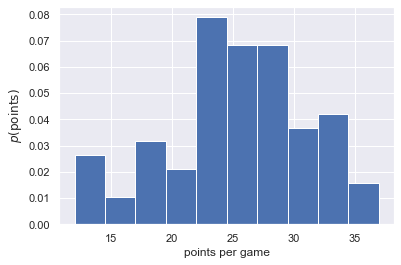

In [89]:
gamelog_lebron= playergamelog.PlayerGameLog(player_id='2544', season = '2015')
df_lebron = gamelog_lebron.get_data_frames()
df_lebron = df_lebron[0]
lebron_pts = df_lebron['PTS']
mu_lebron = np.mean(lebron_pts)
plt.hist(lebron_pts, density=True)
plt.xlabel('points per game')
plt.ylabel(r'$p(\rm points)$')
plt.show()

In [104]:
from math import factorial

def poisson(k, mu):
    """
    Returns a Poisson distribution value for k with mean mu
    """
    return mu**k * np.exp(-mu) / factorial(k) 

poisson = np.vectorize(poisson)

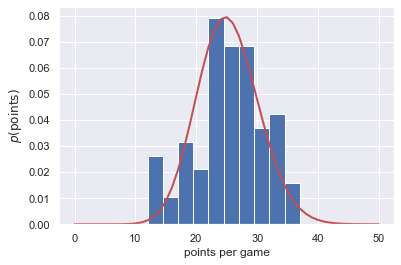

In [108]:
pts_per_game = np.linspace(0, 50, 51)
fit_lebron = poisson(pts_per_game, mu_lebron)
plt.hist(lebron_pts, density=True)
plt.xlabel('points per game')
plt.ylabel(r'$p(\rm points)$')
plt.plot(pts_per_game, fit_lebron, color='r', lw=2)
plt.show()